In [1]:
# reloads modules when they are edited
%load_ext autoreload
%autoreload 2

In [2]:
from sklearn.datasets import fetch_openml

# load the MNIST dataset
mnist_data = fetch_openml('mnist_784')

In [3]:
# using a smaller dataset
X = mnist_data['data'][:7000]
y = mnist_data['target'][:7000]

print(X.shape)
print(y.shape)

(7000, 784)
(7000,)


In [4]:
from sklearn.model_selection import train_test_split

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6000, 784)
(6000,)
(1000, 784)
(1000,)


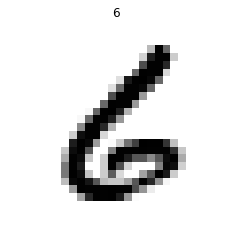

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

index = 2

# plot an example
def plot_example(X, y):
    plt.imshow(X.reshape(28, 28), cmap='binary')
    plt.axis(False)
    plt.title(f"{y}")

plot_example(X_train[index], y_train[index])
plt.show()

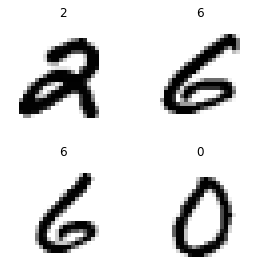

In [6]:
# plot a few examples
fig = plt.figure(figsize=(4, 4))

for i in range(4):
    fig.add_subplot(2, 2, i+1)
    plot_example(X_train[i], y_train[i])

fig.tight_layout()
plt.show()

In [7]:
import numpy as np

def one_hot_encode(x, num_classes=10):
    x_one_hot = x.astype(int).reshape(-1)
    x_one_hot = np.eye(num_classes)[x_one_hot]
    return x_one_hot

# one-hot encode labels
y_train_one_hot = one_hot_encode(y_train)
y_test_one_hot = one_hot_encode(y_test)

In [8]:
# normalize the inputs
X_train_normalized = X_train / 255.0
X_test_normalized = X_test / 255.0

In [9]:
import sys
sys.path.append("..")

from models import Sequential
from layers import Linear, ReLU, Softmax
from losses import CategoricalCrossentropy
from metrics import categorical_accuracy
from optimizers import SGD

# create the model
model = Sequential()
model.add(Linear(128, input_shape=(784,)))
model.add(ReLU())
model.add(Linear(64))
model.add(ReLU())
model.add(Linear(10))
model.add(Softmax())

# using SGD with no momentum
model.configure(loss=CategoricalCrossentropy(),
                optimizer=SGD(learning_rate=0.01),
                metrics={"acc": categorical_accuracy})

# train the model
history = model.train(X_train_normalized, y_train_one_hot,
                          X_test_normalized, y_test_one_hot, epochs=100)

Epoch 01	loss=1.000415	val_loss=1.035709	acc=0.785000	val_acc=0.760000
Epoch 02	loss=0.594448	val_loss=0.641195	acc=0.855667	val_acc=0.822000
Epoch 03	loss=0.455887	val_loss=0.497866	acc=0.883500	val_acc=0.861000
Epoch 04	loss=0.392710	val_loss=0.439055	acc=0.895500	val_acc=0.880000
Epoch 05	loss=0.357834	val_loss=0.406318	acc=0.901667	val_acc=0.892000
Epoch 06	loss=0.321606	val_loss=0.369735	acc=0.912500	val_acc=0.897000
Epoch 07	loss=0.299762	val_loss=0.349602	acc=0.919167	val_acc=0.907000
Epoch 08	loss=0.284933	val_loss=0.339706	acc=0.919167	val_acc=0.906000
Epoch 09	loss=0.266751	val_loss=0.325010	acc=0.924167	val_acc=0.910000
Epoch 10	loss=0.253676	val_loss=0.314724	acc=0.933167	val_acc=0.908000
Epoch 11	loss=0.236043	val_loss=0.300109	acc=0.936167	val_acc=0.918000
Epoch 12	loss=0.226014	val_loss=0.291893	acc=0.941167	val_acc=0.918000
Epoch 13	loss=0.215520	val_loss=0.285833	acc=0.944000	val_acc=0.920000
Epoch 14	loss=0.212359	val_loss=0.284531	acc=0.944833	val_acc=0.914000
Epoch 

In [10]:
from layers import BatchNormalization

# create the model
model = Sequential()
model.add(Linear(128, input_shape=(784,)))
model.add(ReLU())
model.add(BatchNormalization())
model.add(Linear(64))
model.add(ReLU())
model.add(BatchNormalization())
model.add(Linear(10))
model.add(Softmax())

# using SGD with no momentum
model.configure(loss=CategoricalCrossentropy(),
                optimizer=SGD(learning_rate=0.01),
                metrics={"acc": categorical_accuracy})

# train the model
bn_history = model.train(X_train_normalized, y_train_one_hot,
                          X_test_normalized, y_test_one_hot, epochs=100)

Epoch 01	loss=0.547368	val_loss=0.614985	acc=0.858167	val_acc=0.812000
Epoch 02	loss=0.387522	val_loss=0.464307	acc=0.901333	val_acc=0.866000
Epoch 03	loss=0.323076	val_loss=0.402597	acc=0.918167	val_acc=0.883000
Epoch 04	loss=0.275632	val_loss=0.359862	acc=0.927333	val_acc=0.894000
Epoch 05	loss=0.243333	val_loss=0.330428	acc=0.939667	val_acc=0.906000
Epoch 06	loss=0.219510	val_loss=0.309905	acc=0.945500	val_acc=0.909000
Epoch 07	loss=0.199819	val_loss=0.296841	acc=0.949667	val_acc=0.918000
Epoch 08	loss=0.184208	val_loss=0.285453	acc=0.952833	val_acc=0.917000
Epoch 09	loss=0.170375	val_loss=0.273864	acc=0.955333	val_acc=0.920000
Epoch 10	loss=0.158187	val_loss=0.262937	acc=0.960500	val_acc=0.926000
Epoch 11	loss=0.148575	val_loss=0.253145	acc=0.963000	val_acc=0.924000
Epoch 12	loss=0.139891	val_loss=0.249008	acc=0.964000	val_acc=0.932000
Epoch 13	loss=0.130781	val_loss=0.240830	acc=0.967500	val_acc=0.932000
Epoch 14	loss=0.122556	val_loss=0.236516	acc=0.969833	val_acc=0.933000
Epoch 

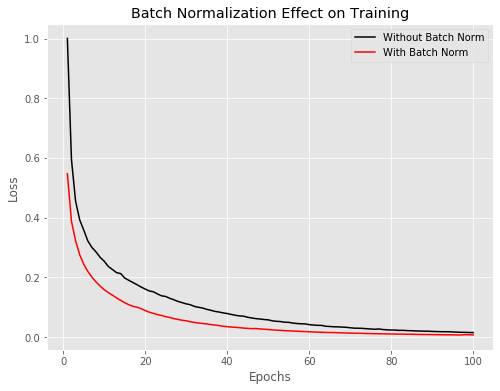

In [11]:
epochs = np.arange(1, 101)
plt.style.use('ggplot')
plt.figure(figsize=(8, 6))
plt.plot(epochs, [e['loss'] for e in history], c='k', label='Without Batch Norm')
plt.plot(epochs, [e['loss'] for e in bn_history], c='r', label='With Batch Norm')
plt.legend()
plt.title("Batch Normalization Effect on Training")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show();